<a href="https://colab.research.google.com/github/fpiedra47/kc-house/blob/main/kc_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [23]:
df = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/Datos/kc_house_data.csv")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
df.shape

(21613, 18)

**Realizar bagged trees y técnicas de regresión forestal aleatoria en el conjunto de datos para predecir el precio a partir de sus características**

In [26]:
cols = df.columns.values.tolist()
predict = cols[:17]
target = cols[17]
X = df[predict]
Y = df[target]

In [27]:
from sklearn.tree import DecisionTreeRegressor
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)

In [29]:
#df.info()

In [30]:
#df.drop(['id', 'date'], axis=1, inplace=True)
#df.head()

In [31]:
regtree.fit(X,Y) 

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [32]:
from sklearn.tree import export_text
text = export_text(regtree)
print(text)

|--- feature_3 <= 82179.50
|   |--- feature_3 <= 30409.50
|   |   |--- feature_3 <= 10707.50
|   |   |   |--- feature_3 <= 6160.50
|   |   |   |   |--- feature_3 <= 2999.50
|   |   |   |   |   |--- value: [2335.63]
|   |   |   |   |--- feature_3 >  2999.50
|   |   |   |   |   |--- value: [4996.28]
|   |   |   |--- feature_3 >  6160.50
|   |   |   |   |--- feature_3 <= 8231.00
|   |   |   |   |   |--- value: [7503.23]
|   |   |   |   |--- feature_3 >  8231.00
|   |   |   |   |   |--- value: [9156.91]
|   |   |--- feature_3 >  10707.50
|   |   |   |--- feature_3 <= 17857.50
|   |   |   |   |--- feature_15 <= -122.46
|   |   |   |   |   |--- value: [36857.00]
|   |   |   |   |--- feature_15 >  -122.46
|   |   |   |   |   |--- value: [12263.74]
|   |   |   |--- feature_3 >  17857.50
|   |   |   |   |--- feature_15 <= -122.44
|   |   |   |   |   |--- value: [48654.56]
|   |   |   |   |--- feature_15 >  -122.44
|   |   |   |   |   |--- value: [19348.71]
|   |--- feature_3 >  30409.50
|   |  

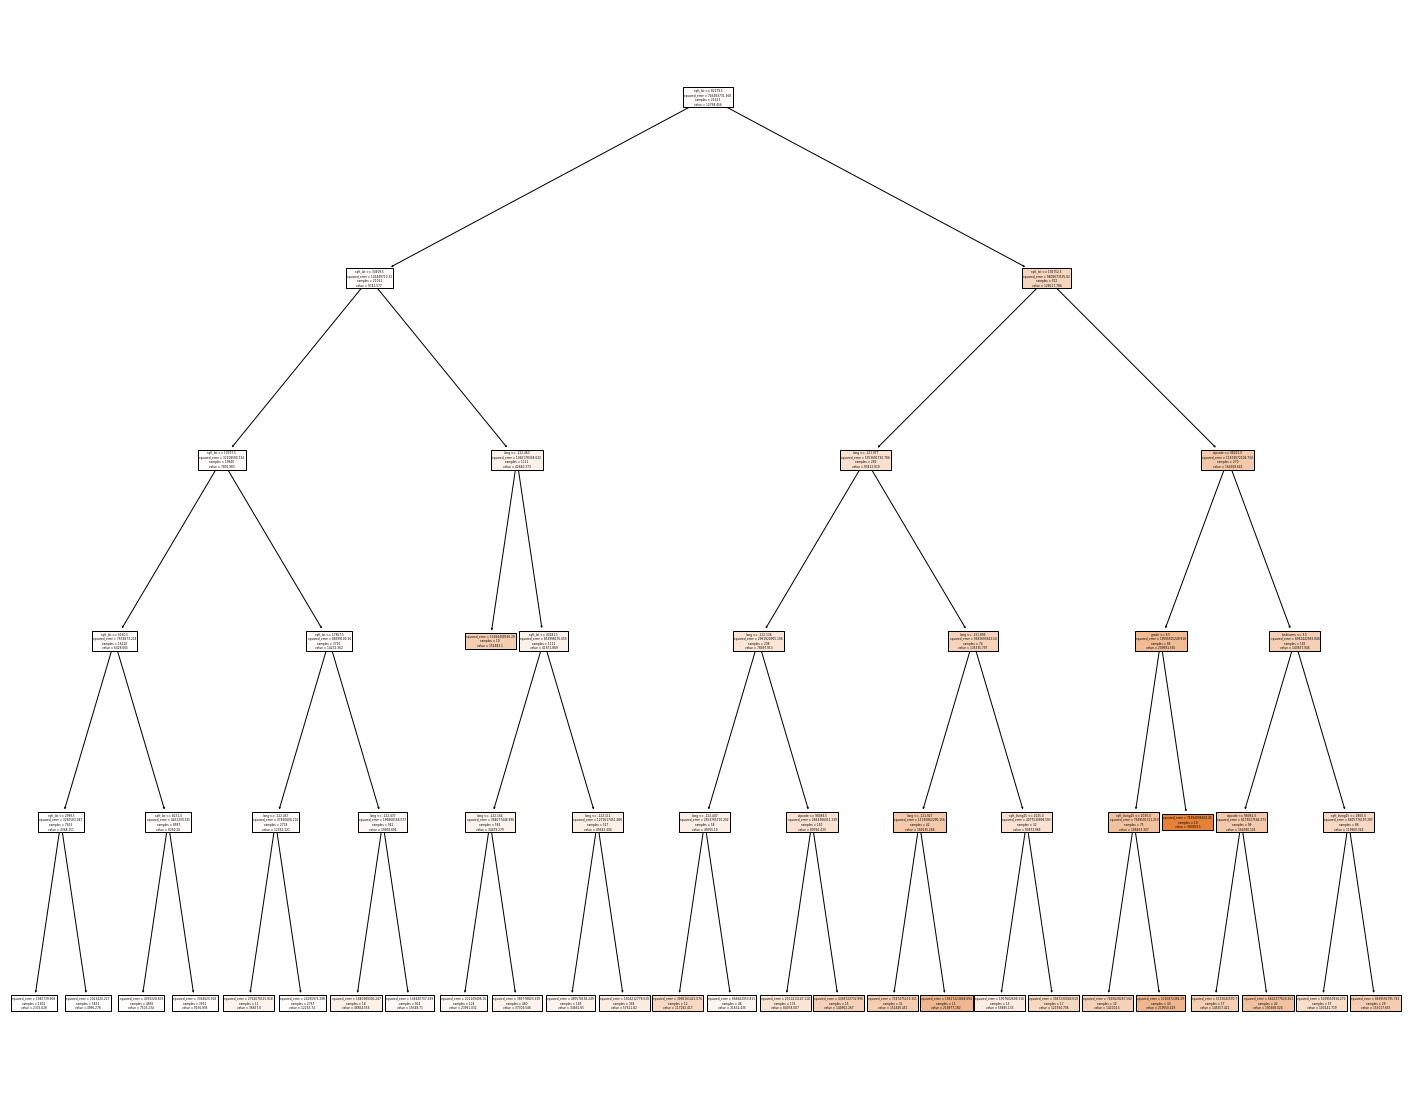

In [33]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regtree, 
                   feature_names = df.columns[:17],
                   class_names = df.columns[17], 
                   filled=True)

In [36]:
preds = regtree.predict(df[predict])
df["preds"] = preds

In [37]:
#df[["preds","yr_built"]]
df[["preds","condition"]]

,preds,condition
0,4996.277997,3
1,7503.233892,3
2,9156.905368,3
3,4996.277997,5
4,7503.233892,3
...,...,...
21608,2335.628191,3
21609,4996.277997,3
21610,2335.628191,3
21611,2335.628191,3


In [39]:
df["error2"] = (df["preds"]-df["condition"])**2

In [40]:
sum(df["error2"])/len(df)

697757940.7722309

Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestRegressor(n_jobs=2, oob_score=True)

In [44]:
df["rforest_pred"] = forest.oob_prediction_
df[["rforest_pred", "condition"]]

,rforest_pred,condition
0,6163.806452,3
1,7647.787879,3
2,16759.388889,3
3,5029.555556,5
4,8007.484848,3
...,...,...
21608,1602.709677,3
21609,7069.861111,3
21610,2832.888889,3
21611,1854.354839,3


In [45]:
df["error2_f"] = (df["rforest_pred"]-df["condition"])**2

In [46]:
sum(df["error2_f"])/len(df)

701603455.4672946

In [47]:
"compresión de las características"
list(zip(preds, forest.feature_importances_))

[(4996.277996913051, 0.005146143824820624),
 (7503.233891752578, 0.017108751662616994),
 (9156.905367590944, 0.030783765169464124),
 (4996.277996913051, 0.6650372089126688),
 (7503.233891752578, 0.004256793170668653),
 (84078.00740740741, 0.0003710411039285544),
 (7503.233891752578, 0.0042279978289274265),
 (9156.905367590944, 0.00594855405414431),
 (7503.233891752578, 0.017594802913160703),
 (7503.233891752578, 0.020817986358824488),
 (9156.905367590944, 0.01103671859909429),
 (4996.277996913051, 0.02534752350721664),
 (19348.709956709958, 0.001993210593076272),
 (9156.905367590944, 0.027462788351883545),
 (4996.277996913051, 0.042825435138335435),
 (4996.277996913051, 0.07462847258150093),
 (12263.7397903867, 0.04541280622966805)]

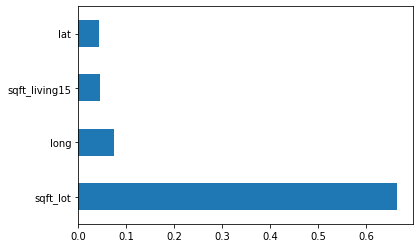

In [49]:
feat_importances=pd.Series(forest.feature_importances_, index= df.columns[0:17])
feat_importances.nlargest(4).plot(kind='barh')